In [5]:
import pandas as pd

file_path = 'BMW_sales_data_2010_2024.csv'

try:
    bmw_df = pd.read_csv(file_path)
    print("BMW dataset loaded successfully!\n")
    print("First 5 rows:")
    print(bmw_df.head())
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}' in the current directory.")
    print("Make sure the CSV file is in the SAME folder as the notebook.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

BMW dataset loaded successfully!

First 5 rows:
      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


In [6]:
bmw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
bmw_df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [8]:
print("Unique Regions:", bmw_df['Region'].unique())
print("Unique Fuel Types:", bmw_df['Fuel_Type'].unique())
print("Unique Transmissions:", bmw_df['Transmission'].unique())

Unique Regions: ['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
Unique Fuel Types: ['Petrol' 'Hybrid' 'Diesel' 'Electric']
Unique Transmissions: ['Manual' 'Automatic']


In [9]:
duplicate_rows = bmw_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [10]:
print("Unique Models:", bmw_df['Model'].unique())
print("Unique Colors:", bmw_df['Color'].unique())
print("Unique Sales Class.:", bmw_df['Sales_Classification'].unique())

Unique Models: ['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']
Unique Colors: ['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']
Unique Sales Class.: ['High' 'Low']


In [11]:
# Group by 'Year' and sum the 'Sales_Volume' for each year
sales_by_year = bmw_df.groupby('Year')['Sales_Volume'].sum()

print("Total Sales Volume by Year:")
print(sales_by_year)

Total Sales Volume by Year:
Year
2010    16933445
2011    16758941
2012    16751895
2013    16866733
2014    16958960
2015    17010207
2016    16957550
2017    16620811
2018    16412273
2019    17191956
2020    16310843
2021    16884666
2022    17920946
2023    16268654
2024    17527854
Name: Sales_Volume, dtype: int64


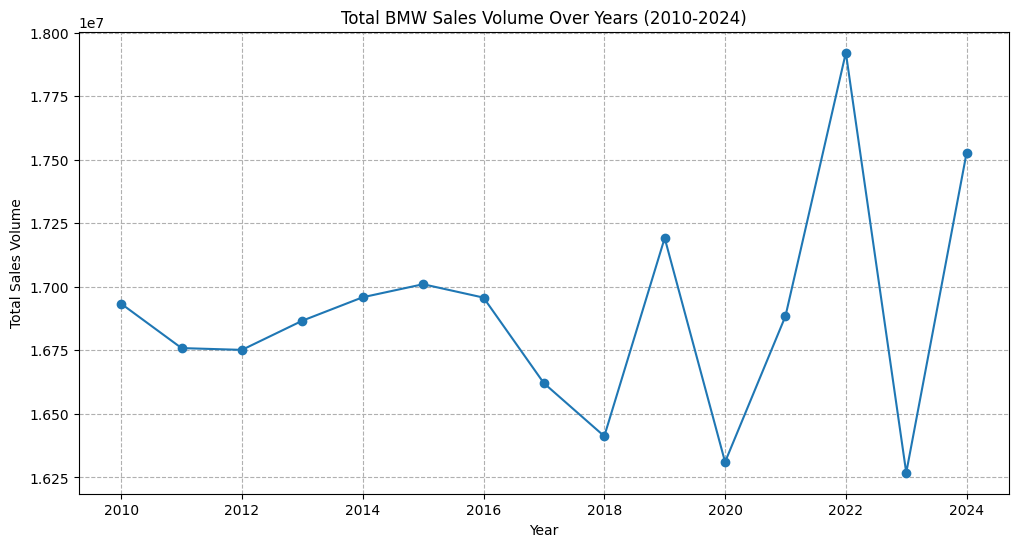

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) 
sales_by_year.plot(kind='line', marker='o') 
plt.title('Total BMW Sales Volume Over Years (2010-2024)') 
plt.xlabel('Year') 
plt.ylabel('Total Sales Volume') 
plt.grid(True, linestyle='--') 
plt.show() 

In [14]:
# Group by 'Region' and sum the 'Sales_Volume'
sales_by_region = bmw_df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False) #
print("Total Sales Volume by Region:")
print(sales_by_region)

Total Sales Volume by Region:
Region
Asia             42974277
Europe           42555138
North America    42402629
Middle East      42326620
Africa           41565252
South America    41551818
Name: Sales_Volume, dtype: int64


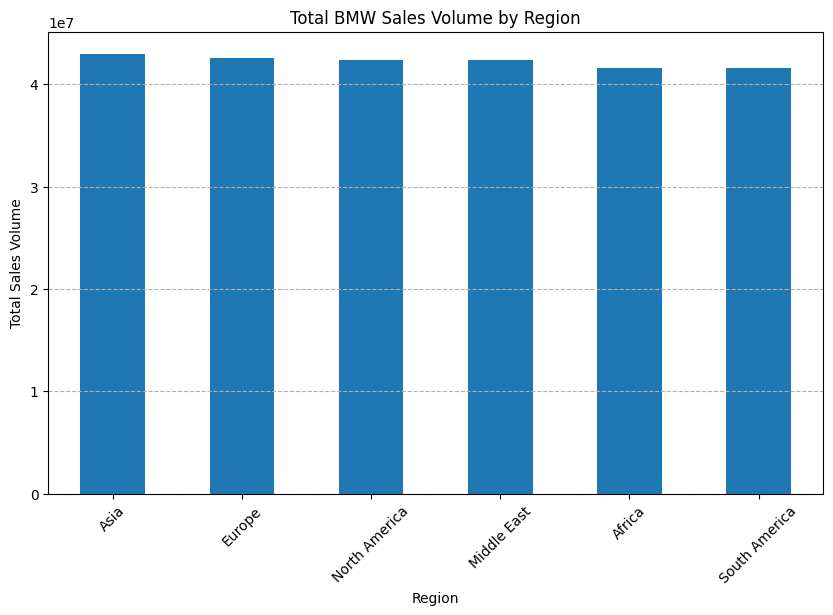

In [15]:
plt.figure(figsize=(10, 6)) 
sales_by_region.plot(kind='bar') 
plt.title('Total BMW Sales Volume by Region') 
plt.xlabel('Region') 
plt.ylabel('Total Sales Volume') 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--') 
plt.show() 

In [16]:
# Group by 'Model' and sum the 'Sales_Volume'
# Show top 10 models only for clarity
sales_by_model = bmw_df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10)

print("Top 10 BMW Models by Total Sales Volume:")
print(sales_by_model)

Top 10 BMW Models by Total Sales Volume:
Model
7 Series    23786466
i8          23423891
X1          23406060
3 Series    23281303
i3          23133849
5 Series    23097519
M5          22779688
X3          22745529
X5          22709749
X6          22661986
Name: Sales_Volume, dtype: int64


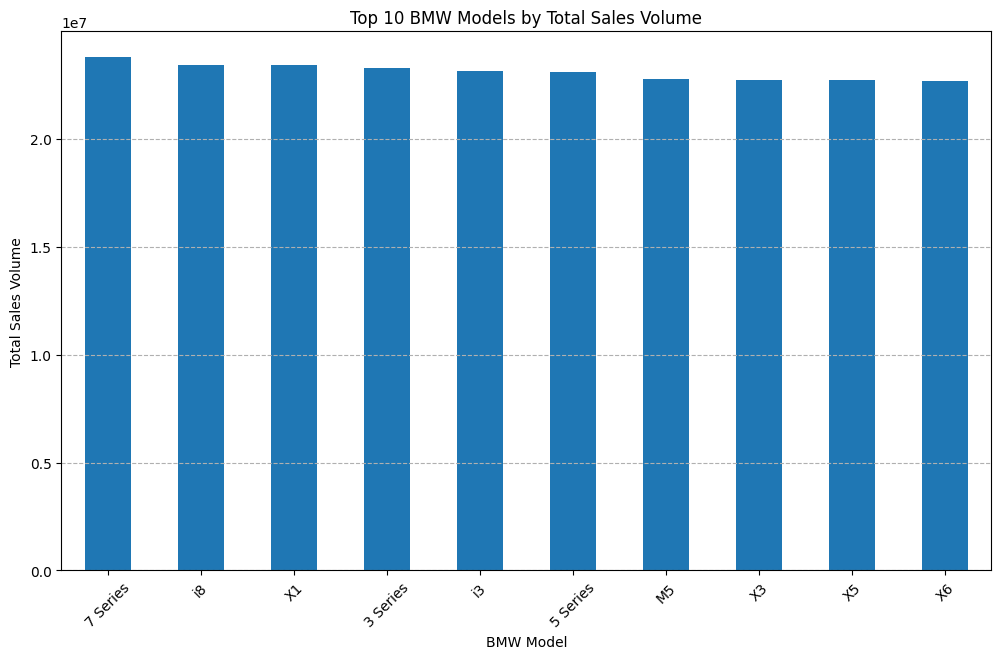

In [17]:
plt.figure(figsize=(12, 7)) 
sales_by_model.plot(kind='bar') 
plt.title('Top 10 BMW Models by Total Sales Volume') 
plt.xlabel('BMW Model') 
plt.ylabel('Total Sales Volume') 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--') 
plt.show() 

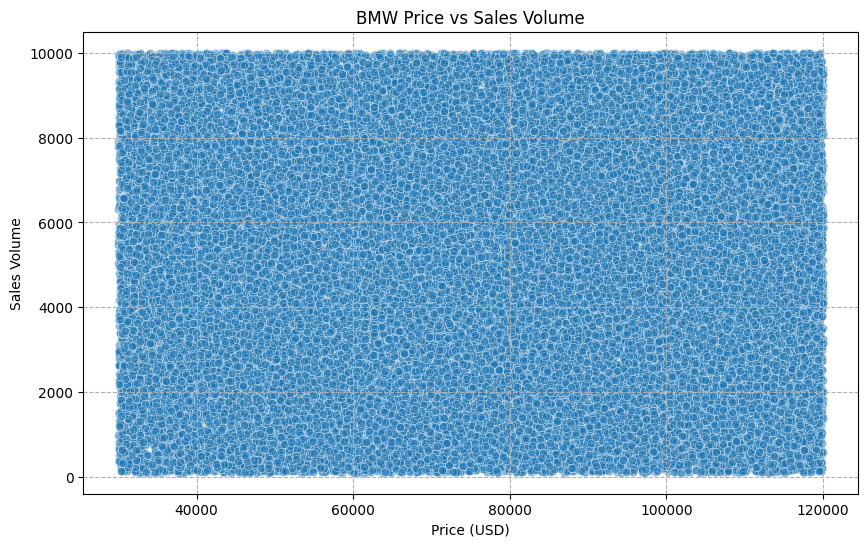

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10, 6)) 


sns.scatterplot(data=bmw_df, x='Price_USD', y='Sales_Volume', alpha=0.5)

plt.title('BMW Price vs Sales Volume')
plt.xlabel('Price (USD)') 
plt.ylabel('Sales Volume')
plt.grid(True, linestyle='--') 
plt.show() 

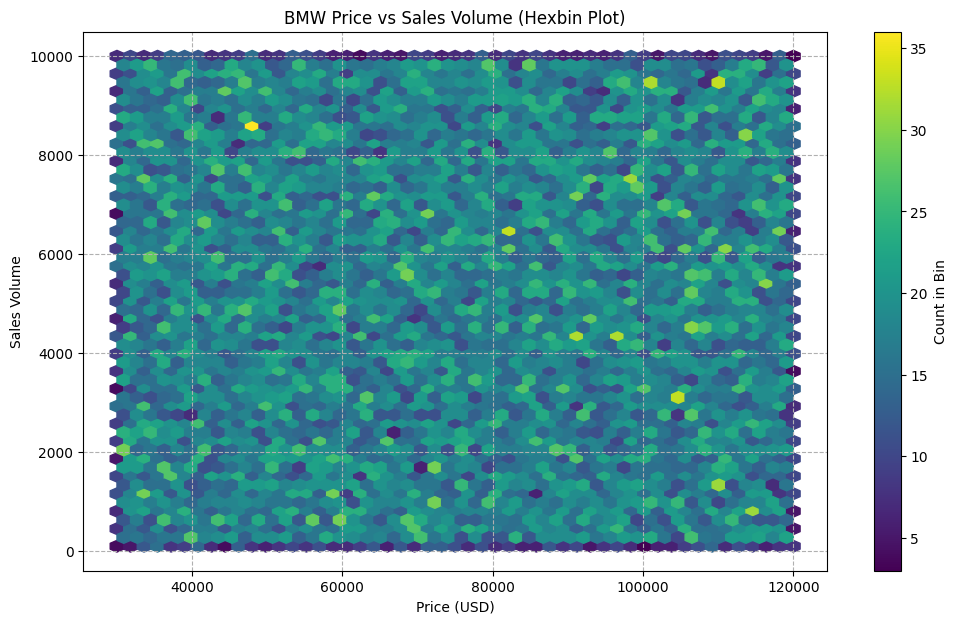

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7)) 

plt.hexbin(data=bmw_df, x='Price_USD', y='Sales_Volume', gridsize=50, cmap='viridis')

plt.colorbar(label='Count in Bin') 
plt.title('BMW Price vs Sales Volume (Hexbin Plot)') 
plt.xlabel('Price (USD)') 
plt.ylabel('Sales Volume')
plt.grid(True, linestyle='--')
plt.show() 

In [22]:

avg_sales_by_fuel = bmw_df.groupby('Fuel_Type')['Sales_Volume'].mean().sort_values(ascending=False)

print("Average Sales Volume by Fuel Type:")
print(avg_sales_by_fuel)

Average Sales Volume by Fuel Type:
Fuel_Type
Diesel      5085.363940
Hybrid      5074.873938
Electric    5064.362521
Petrol      5045.749323
Name: Sales_Volume, dtype: float64


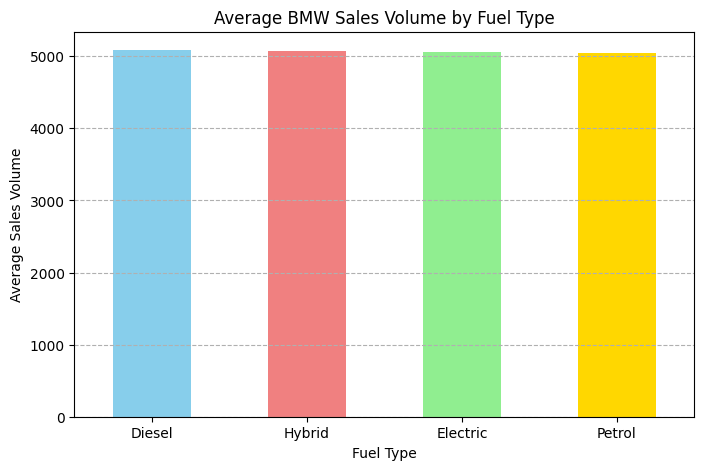

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5)) # Chart size
avg_sales_by_fuel.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold']) 
plt.title('Average BMW Sales Volume by Fuel Type') 
plt.xlabel('Fuel Type') 
plt.ylabel('Average Sales Volume') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--') 
plt.show() 

In [24]:
# Group by both 'Region' and 'Fuel_Type', then sum the 'Sales_Volume'
sales_region_fuel = bmw_df.groupby(['Region', 'Fuel_Type'])['Sales_Volume'].sum()

# To make it easier to read, let's unstack it into a table
sales_pivot = sales_region_fuel.unstack()

print("Total Sales Volume by Region and Fuel Type:")
print(sales_pivot)

Total Sales Volume by Region and Fuel Type:
Fuel_Type        Diesel  Electric    Hybrid    Petrol
Region                                               
Africa         10211670  10329085  10486034  10538463
Asia           10492033  10596850  11422396  10462998
Europe         10406133  10590064  10825662  10733279
Middle East    10491957  10395195  10627320  10812148
North America  10259904  10861198  10808682  10472845
South America  10500121  10385273  10362003  10304421


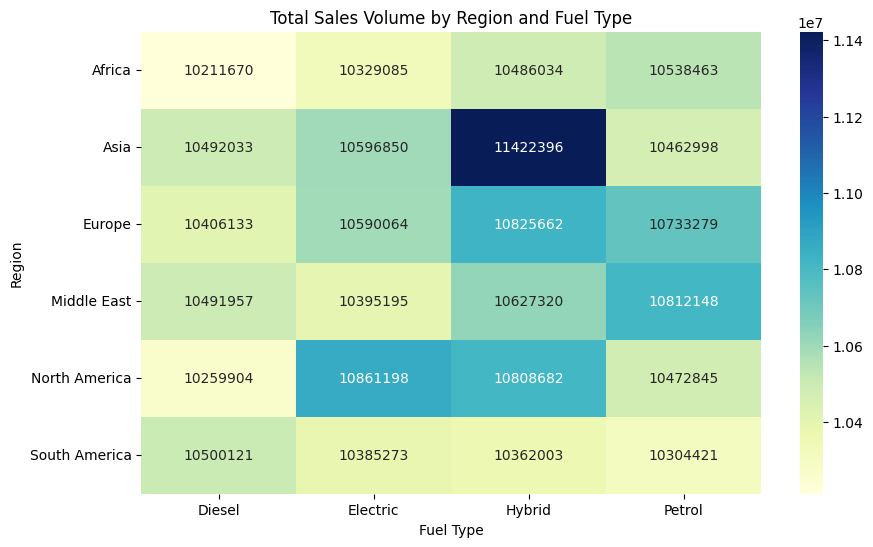

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 

# Create the heatmap
sns.heatmap(sales_pivot, cmap="YlGnBu", annot=True, fmt=".0f") 

plt.title('Total Sales Volume by Region and Fuel Type') 
plt.xlabel('Fuel Type') 
plt.ylabel('Region') 
plt.show() 

In [26]:
import sqlite3


conn = sqlite3.connect('bmw_sales.sqlite')


bmw_df.to_sql('bmw_sales', conn, if_exists='replace', index=False)

print("Succesfull!")

conn.close()

Succesfull!


In [27]:
import pandas as pd
import sqlite3


conn = sqlite3.connect('bmw_sales.sqlite')

query = """
SELECT
    Model,
    SUM(Sales_Volume) AS Total_Sales
FROM
    bmw_sales
GROUP BY
    Model
ORDER BY
    Total_Sales DESC
LIMIT 5;
"""


top_models_df = pd.read_sql_query(query, conn)

print("SQL Query Result - Top 5 Models by Sales:")
print(top_models_df)


conn.close()

SQL Query Result - Top 5 Models by Sales:
      Model  Total_Sales
0  7 Series     23786466
1        i8     23423891
2        X1     23406060
3  3 Series     23281303
4        i3     23133849


In [28]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('bmw_sales.sqlite')


query_for_bi = """
SELECT
    Year,
    Region,
    Model,
    SUM(Sales_Volume) AS Total_Sales_Volume,
    AVG(Price_USD) AS Average_Price_USD
FROM
    bmw_sales
GROUP BY
    Year, Region, Model;
"""

bi_data_df = pd.read_sql_query(query_for_bi, conn)

print("Data for Power BI Dashboard (first 5 rows):")
print(bi_data_df.head())

output_csv_path = 'bmw_analysis_for_bi.csv'
bi_data_df.to_csv(output_csv_path, index=False) 

print(f"\nData successfully saved to '{output_csv_path}'!")
print("Now you can import this CSV file into Power BI or Tableau.")


conn.close()

Data for Power BI Dashboard (first 5 rows):
   Year  Region     Model  Total_Sales_Volume  Average_Price_USD
0  2010  Africa  3 Series              307811       79320.883333
1  2010  Africa  5 Series              251656       75270.618182
2  2010  Africa  7 Series              259479       77572.792453
3  2010  Africa        M3              206661       71968.465116
4  2010  Africa        M5              181521       72873.000000

Data successfully saved to 'bmw_analysis_for_bi.csv'!
Now you can import this CSV file into Power BI or Tableau.
